# Analysis of the price data for each route

This document was created within the analysing process of the data. As we couln't obtain so much relevant data from this, we didn't transfered it to out main descriptive file. These analysis on the flight routes were a good practice to gain a feeling for the data and to get a quick overview. 

In [1]:
# libraries we use
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from pandas import DataFrame


In [2]:
# Read in data into a dataframe 
flight_data = pd.read_csv("./data/train.csv", parse_dates=['Flight_Date','Request_Date'])

# Display top of dataframe
flight_data.head()

,Request_Date,Flight_Date,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price
0,2019-06-03 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07
1,2019-06-03 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
2,2019-06-04 11:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
3,2019-06-04 23:00:00+00:00,2019-06-05,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
4,2019-06-03 11:00:00+00:00,2019-06-05,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37


In [3]:
# See the column data types and non-missing values 
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83624 entries, 0 to 83623
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Request_Date      83624 non-null  datetime64[ns, UTC]
 1   Flight_Date       83624 non-null  datetime64[ns]     
 2   Departure_hour    83624 non-null  int64              
 3   flight_unique_id  83624 non-null  object             
 4   route_abb         83624 non-null  object             
 5   flight_number     83624 non-null  object             
 6   Price             83624 non-null  float64            
 7   Currency          83624 non-null  object             
 8   min_future_price  83624 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.7+ MB


There are no data quality issues. There are 83.624 instances in the given training data set with no missing data values. 

In [4]:
# transform the date data to calculate the duration between request and flight date
flight_data['Request_Date'] = flight_data['Request_Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))
flight_data['Flight_Date'] =flight_data['Flight_Date'] + pd.to_timedelta(flight_data['Departure_hour'], 'h')

In [5]:
# transform data type of Request_Date back to datetime64[ns, UTC] 
flight_data['Request_Date'] = pd.to_datetime(flight_data['Request_Date'])

In [6]:
# Create new feature duration time between request and flight date 
Duration_Time = flight_data['Flight_Date'] - flight_data['Request_Date']
Duration_Time = -1 * Duration_Time.apply(lambda x: x.total_seconds())     
Duration_Time = divmod(Duration_Time, 3600)[0]
flight_data.insert(2, "Duration_Time", Duration_Time, True)

In [50]:
flight_data.head()

,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price
0,2019-06-03 11:00:00,2019-06-05 19:00:00,-56.0,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07
1,2019-06-03 23:00:00,2019-06-05 19:00:00,-44.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
2,2019-06-04 11:00:00,2019-06-05 19:00:00,-32.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
3,2019-06-04 23:00:00,2019-06-05 19:00:00,-20.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07
4,2019-06-03 11:00:00,2019-06-05 21:00:00,-58.0,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37


### Analyse the price changes for the routes and specific flights

In [7]:
# Split the data set into smaller groups, splitted by routes and we receive four groupes
g_routes = flight_data.groupby('route_abb')

In [8]:
# Show the dataframe for each route 
for route_abb, route_abb_df in g_routes:
    print(route_abb)
    print(route_abb_df)

FRA-STN
             Request_Date         Flight_Date  Duration_Time  Departure_hour  \
141   2019-06-03 11:00:00 2019-06-08 18:00:00         -127.0              18   
142   2019-06-03 23:00:00 2019-06-08 18:00:00         -115.0              18   
143   2019-06-04 11:00:00 2019-06-08 18:00:00         -103.0              18   
144   2019-06-04 23:00:00 2019-06-08 18:00:00          -91.0              18   
145   2019-06-05 11:00:00 2019-06-08 18:00:00          -79.0              18   
...                   ...                 ...            ...             ...   
82639 2019-08-01 11:00:00 2019-09-09 18:00:00         -943.0              18   
82640 2019-08-01 23:00:00 2019-09-09 18:00:00         -931.0              18   
82641 2019-08-02 11:00:00 2019-09-09 18:00:00         -919.0              18   
82642 2019-08-02 23:00:00 2019-09-09 18:00:00         -907.0              18   
82643 2019-08-03 11:00:00 2019-09-09 18:00:00         -895.0              18   

         flight_unique_id route

### We analyse the requested prices and the min future price for the route STN-FRA.

In [9]:
# get a specific group from the splitted data set, we take route STN-FRA
g_stn_fra = g_routes.get_group('STN-FRA')

In [10]:
# show the min, max and median prices in regards to the duration time
round(g_stn_fra.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median']), 2)

,count,min,max,median
Duration_Time,,,,
-2360.0,1,39.46,39.46,39.46
-2348.0,2,19.99,39.46,29.72
-2336.0,3,19.99,50.38,39.46
-2325.0,1,19.99,19.99,19.99
-2324.0,3,19.99,50.38,31.20
...,...,...,...,...
-56.0,30,33.04,223.37,119.09
-45.0,10,52.01,265.19,119.10
-44.0,20,52.01,226.43,108.89


In [11]:
route_a_price = round(g_stn_fra.groupby('Duration_Time').median(), 2)
route_a_price.index.name = 'Duration_Time'
route_a_price.reset_index(inplace=True)
route_a_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2360.0,19,39.46,19.99
1,-2348.0,13,29.72,18.98
2,-2336.0,19,39.46,19.99
3,-2325.0,8,19.99,19.99
4,-2324.0,19,31.20,19.99


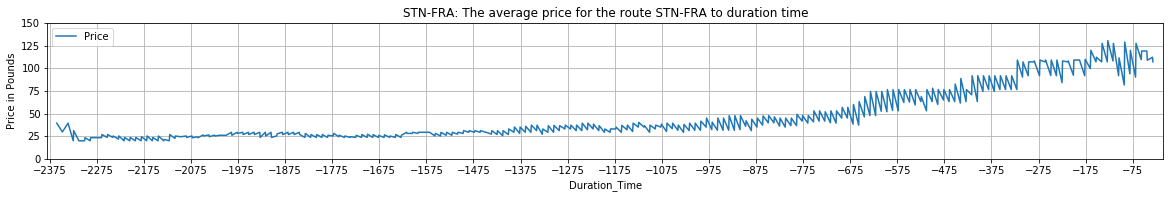

In [12]:
# print("The average requested price for the route STN-FRA to the hours before flight")
df = DataFrame(route_a_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-FRA: The average price for the route STN-FRA to duration time')

plt.grid(True)
plt.xlim(-2380, -10)
plt.ylim(0, 150)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested prices and the min future price for the route FRA-STN.

In [63]:
# get a specific group from the splitted data set, we take route FRA-STN
g_fra_stn = g_routes.get_group('FRA-STN')

In [64]:
# show the min, max and median prices in regards to the duration time
g_fra_stn.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2359.0,1,30.33,30.33,30.33
-2347.0,2,19.99,30.33,25.16
-2335.0,3,19.99,30.33,30.33
-2324.0,1,30.33,30.33,30.33
-2323.0,3,19.99,30.33,25.13
...,...,...,...,...
-55.0,26,79.47,311.09,157.07
-44.0,8,106.07,262.13,153.50
-43.0,21,88.73,264.17,208.07


In [65]:
route_b_price = g_fra_stn.groupby('Duration_Time').median()
route_b_price.index.name = 'Duration_Time'
route_b_price.reset_index(inplace=True)
route_b_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2359.0,18,30.33,19.990
1,-2347.0,12,25.16,18.985
2,-2335.0,18,30.33,19.990
3,-2324.0,7,30.33,17.990
4,-2323.0,18,25.13,19.990


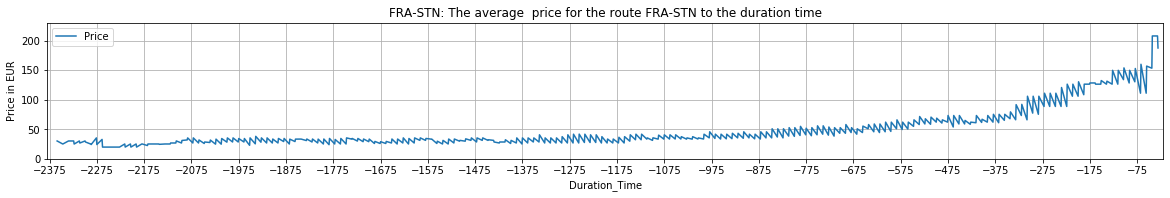

In [67]:
# print("The average requested price for the route FRA-STN to the hours before flight")
df = DataFrame(route_b_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in EUR')
plt.title('FRA-STN: The average  price for the route FRA-STN to the duration time')

plt.grid(True)
plt.xlim(-2380, -20)
plt.ylim(0, 230)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested prices and the min future price for the route STN-SXF.

In [69]:
# get a specific group from the splitted data set, we take route STN-SXF
g_stn_sxf = g_routes.get_group('STN-SXF')

In [70]:
g_stn_sxf.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2372.0,1,19.99,19.99,19.99
-2371.0,1,19.99,19.99,19.99
-2360.0,3,19.99,19.99,19.99
-2359.0,1,19.99,19.99,19.99
-2348.0,4,19.99,19.99,19.99
...,...,...,...,...
-32.0,54,74.45,228.47,182.57
-31.0,21,25.29,228.47,186.21
-22.0,4,88.73,223.37,127.49


In [71]:
route_c_price = g_stn_sxf.groupby('Duration_Time').median()
route_c_price.index.name = 'Duration_Time'
route_c_price.reset_index(inplace=True)
route_c_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2372.0,7,19.99,9.99
1,-2371.0,6,19.99,9.99
2,-2360.0,19,19.99,17.99
3,-2359.0,6,19.99,9.99
4,-2348.0,13,19.99,13.99


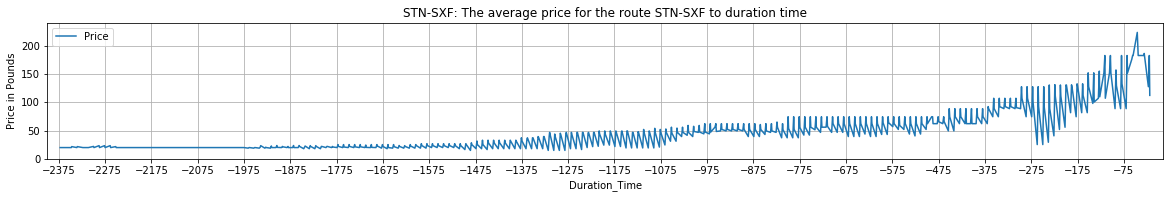

In [72]:
# print("The average price for the route STN-SXF to the hours before flight")
df = DataFrame(route_c_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-SXF: The average price for the route STN-SXF to duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 240)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested prices and the min future price for the route SXF-STN.

In [73]:
# get a specific group from the splitted data set, we take route SXF-STN
g_sxf_stn = g_routes.get_group('SXF-STN')

In [74]:
g_sxf_stn.groupby('Duration_Time').Price.agg(['count', 'min', 'max', 'median'])

,count,min,max,median
Duration_Time,,,,
-2375.0,1,28.55,28.55,28.55
-2371.0,1,19.99,19.99,19.99
-2363.0,2,19.99,28.55,24.27
-2359.0,2,19.99,73.43,46.71
-2351.0,3,25.13,28.55,25.13
...,...,...,...,...
-31.0,57,50.99,266.13,180.53
-23.0,51,50.99,266.13,208.07
-22.0,1,111.17,111.17,111.17


In [75]:
route_d_price = g_sxf_stn.groupby('Duration_Time').median()
route_d_price.index.name = 'Duration_Time'
route_d_price.reset_index(inplace=True)
route_d_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2375.0,10,28.55,9.99
1,-2371.0,6,19.99,9.99
2,-2363.0,16,24.27,16.82
3,-2359.0,12,46.71,27.94
4,-2351.0,10,25.13,23.65


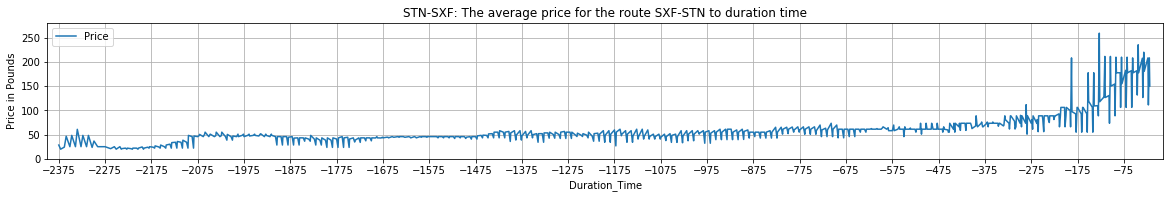

In [77]:
# print("The average price for the route SXF-STN to the hours before flight")
df = DataFrame(route_d_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price in Pounds')
plt.title('STN-SXF: The average price for the route SXF-STN to duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 280)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

### We analyse the requested average prices for all routes.

In [78]:
# Aggregated Average Minimum Price for all routes 
route_all_price = flight_data.groupby('Duration_Time').median()
route_all_price.index.name = 'Duration_Time'
route_all_price.reset_index(inplace=True)
route_all_price.head()

,Duration_Time,Departure_hour,Price,min_future_price
0,-2375.0,10,28.55,9.99
1,-2372.0,7,19.99,9.99
2,-2371.0,6,19.99,9.99
3,-2363.0,16,24.27,16.82
4,-2360.0,19,19.99,17.99


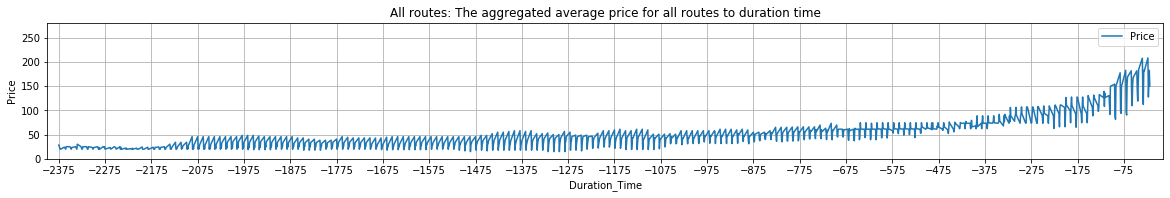

In [79]:
# print("The average minimum price for all route to hours before flight")
df = DataFrame(route_all_price,columns=['Duration_Time','Price'])
df.plot(x = 'Duration_Time', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Duration_Time')
plt.ylabel('Price')
plt.title('All routes: The aggregated average price for all routes to duration time')

plt.grid(True)
plt.xlim(-2400, 10)
plt.ylim(0, 280)
plt.xticks(np.arange(Duration_Time.min(), Duration_Time.max(), 100))

plt.show()

## Analyse the price in regards to the weekday 

In [80]:
train_data = pd.read_csv("./data/converted_train_2020_07_09_00-15-27.csv", parse_dates=['Flight_Date','Request_Date'])
train_data.head()

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour
0,0,2019-06-03,2019-06-05,56.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,208.070000,259.070000,Monday,Morning,Evening,907.2,11:00
1,1,2019-06-03,2019-06-05,44.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Monday,Night,Evening,907.2,23:00
2,2,2019-06-04,2019-06-05,32.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Morning,Evening,907.2,11:00
3,3,2019-06-04,2019-06-05,20.0,19:00,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Night,Evening,907.2,23:00
4,4,2019-06-03,2019-06-05,58.0,21:00,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,112.979088,197.946027,Monday,Morning,Night,907.2,11:00


In [81]:
train_data['Request_Weekday_num'] = train_data.Request_Weekday.map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6 })

In [82]:
# Split the data set into smaller groups, splitted by routes and we receive four groupes
g_weekday = train_data.groupby('Request_Weekday_num')

In [95]:
# get a specific group from the splitted data set, we take weekday 0 = Monday
g_monday = g_weekday.get_group(0)

In [122]:
price_monday = g_monday.groupby('Request_Date').median()
price_monday.index.name = 'Request_Date'
price_monday.reset_index(inplace=True)
price_monday.drop(columns=['Price', 'min_future_price'])
price_monday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-03,23962.0,1256.0,41.66,30.33,38.550000,28.550000,907.2,0.0
1,2019-06-10,26491.5,1148.0,45.89,33.04,41.776989,30.330000,907.2,0.0
2,2019-06-17,31402.0,1100.0,49.41,36.40,45.890000,33.450000,907.2,0.0
3,2019-06-24,36063.5,1027.0,47.73,37.27,45.890000,35.263429,907.2,0.0
4,2019-07-01,41076.5,943.5,53.03,42.83,49.923581,40.790000,907.2,0.0
5,2019-07-08,45193.5,848.0,65.27,43.34,61.190000,42.804006,907.2,0.0
6,2019-07-15,49168.0,752.0,62.21,43.85,62.210000,42.830000,907.2,0.0
7,2019-07-22,53470.0,659.0,55.58,50.38,54.990000,45.890000,907.2,0.0
8,2019-07-29,56357.5,543.0,73.43,62.21,67.334813,61.190000,907.2,0.0


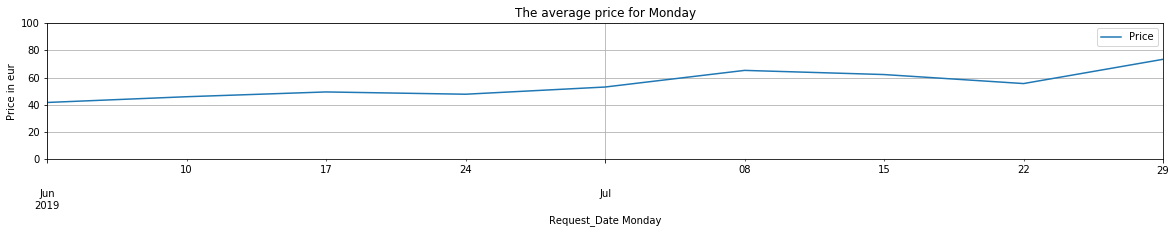

In [124]:
# print("The average prices for the specific weekday 0")
df = DataFrame(price_monday,columns=['Request_Date','Price'])
df.plot(x = 'Request_Date', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Monday')
plt.ylabel('Price in eur')
plt.title('The average price for Monday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()

In [116]:
# get a specific group from the splitted data set, we take weekday 1 = Tuesday
g_tuesday = g_weekday.get_group(1)

In [121]:
price_tuesday = g_tuesday.groupby('Request_Date').median()
price_tuesday.index.name = 'Request_Date'
price_tuesday.reset_index(inplace=True)
price_tuesday.drop(columns=['Price', 'min_future_price'])
price_tuesday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-04,23866.0,1231.0,45.89,30.33,45.890000,29.319035,907.2,1.0
1,2019-06-11,27449.5,1148.0,43.34,33.04,41.700689,30.330000,907.2,1.0
2,2019-06-18,33049.0,1112.0,49.41,36.40,45.890000,33.320498,907.2,1.0
3,2019-06-25,37347.0,1027.5,48.44,38.55,45.890000,36.045000,907.2,1.0
4,2019-07-02,41937.5,932.0,55.82,43.34,52.860813,41.868268,907.2,1.0
5,2019-07-09,45858.0,836.0,62.21,43.34,61.190000,42.830000,907.2,1.0
6,2019-07-16,50211.5,742.0,61.19,43.34,56.150746,42.830000,907.2,1.0
7,2019-07-23,54326.0,655.0,61.19,50.99,55.883243,46.720583,907.2,1.0
8,2019-07-30,57093.5,535.0,74.45,62.21,73.430000,61.190000,907.2,1.0


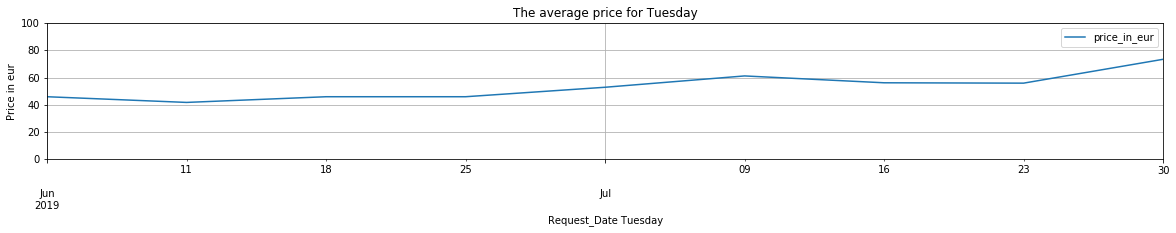

In [125]:
# print("The average prices for the specific weekday 1")
df = DataFrame(price_tuesday,columns=['Request_Date','price_in_eur'])
df.plot(x = 'Request_Date', y='price_in_eur', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Tuesday')
plt.ylabel('Price in eur')
plt.title('The average price for Tuesday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()

In [97]:
# get a specific group from the splitted data set, we take weekday 2 = Wednesday
g_wednesday = g_weekday.get_group(2)

In [123]:
price_wednesday = g_wednesday.groupby('Request_Date').median()
price_wednesday.index.name = 'Request_Date'
price_wednesday.reset_index(inplace=True)
price_wednesday.drop(columns=['Price', 'min_future_price'])
price_wednesday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-05,24456.0,1220.0,45.890,30.33,45.890000,29.283682,907.2,2.0
1,2019-06-12,28140.5,1137.5,40.790,34.26,40.790000,32.600316,907.2,2.0
2,2019-06-19,32165.5,1075.0,48.085,37.27,45.890000,34.260000,907.2,2.0
3,2019-06-26,36557.5,983.0,49.410,38.55,45.890000,37.479305,907.2,2.0
4,2019-07-03,42799.0,931.0,62.410,43.34,61.190000,42.523550,907.2,2.0
5,2019-07-10,46347.0,824.0,56.910,43.34,55.944209,42.095297,907.2,2.0
6,2019-07-17,50642.0,728.0,61.190,43.85,56.200514,43.119282,907.2,2.0
7,2019-07-24,54940.5,635.0,62.210,50.99,56.365119,50.731281,907.2,2.0
8,2019-07-31,57400.0,512.0,75.470,66.21,73.430000,65.190000,907.2,2.0


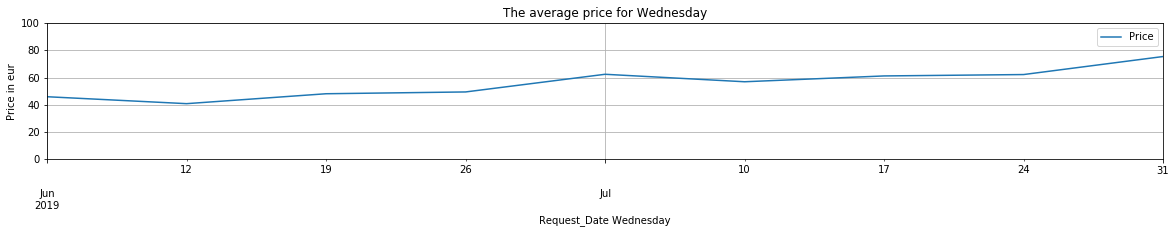

In [126]:
# print("The average prices for the specific weekday 2")
df = DataFrame(price_wednesday,columns=['Request_Date','Price'])
df.plot(x = 'Request_Date', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Wednesday')
plt.ylabel('Price in eur')
plt.title('The average price for Wednesday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()

In [127]:
# get a specific group from the splitted data set, we take weekday 5 = Saturday
g_saturday = g_weekday.get_group(5)

In [128]:
price_saturday = g_saturday.groupby('Request_Date').median()
price_saturday.index.name = 'Request_Date'
price_saturday.reset_index(inplace=True)
price_saturday.drop(columns=['Price', 'min_future_price'])
price_saturday

,Request_Date,Unnamed: 0,Duration_Time,Price,min_future_price,price_in_eur,min_future_price_in_eur,flight_distance_km,Request_Weekday_num
0,2019-06-08,26188.5,1195.0,39.46,31.20,37.475000,29.361326,907.2,5.0
1,2019-06-15,29524.0,1100.0,46.81,36.71,44.039792,33.219248,907.2,5.0
2,2019-06-22,35448.0,1063.0,45.89,36.71,42.673006,33.650000,907.2,5.0
3,2019-06-29,40397.0,980.0,48.95,39.77,45.890000,38.550000,907.2,5.0
4,2019-07-06,44630.0,887.0,73.43,43.34,66.764527,42.830000,907.2,5.0
5,2019-07-13,48550.0,788.0,62.21,43.85,61.190000,42.830000,907.2,5.0
6,2019-07-20,53206.0,703.0,56.61,43.85,55.830987,42.830000,907.2,5.0
7,2019-07-27,56109.5,584.0,62.21,61.19,61.190000,55.928656,907.2,5.0
8,2019-08-03,59359.0,477.0,75.47,75.47,75.430000,75.430000,907.2,5.0


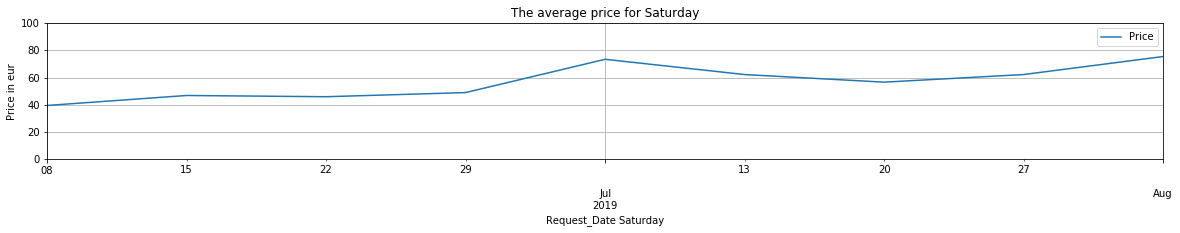

In [129]:
# print("The average prices for the specific weekday 5")
df = DataFrame(price_saturday,columns=['Request_Date','Price'])
df.plot(x = 'Request_Date', y='Price', kind = 'line', figsize=(20,2.5))

plt.xlabel('Request_Date Saturday')
plt.ylabel('Price in eur')
plt.title('The average price for Saturday')

plt.grid(True)
plt.ylim(0, 100)
plt.show()